

```
# a) Design neural networks and implement them.
• Find Assignment 5 mnist.ipynb and mnist.zip.
• train X and test X are list of intensities in 8-bit gray scale of 28 × 28 images.
• train y and test y are list of integers which are the classes of the corresponding images.
• The objective of the networks is classifying images into 0 to 9.
(b) Split the training dataset into sub training and validation sets randomly. Use 1/6 of training dataset as validation set. Use the ‘accuracy’ as metric. Please repeat 10 times of random split for each hyper-parameters and architecture, and aggregate
(average) the accuracy.

```



In [24]:
#from mnist import MNIST
import os
#import numpy as np

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
from keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#mndata = MNIST('mnist')

#X_train, y_train = mndata.load_training()
#X_test, y_test = mndata.load_testing()



In [25]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

np.shape(X_test)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


(10000, 784)

In [32]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

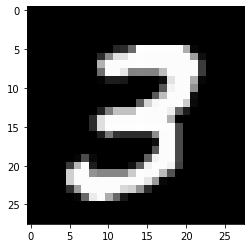

3


In [26]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(X_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])



```
# Average Accuracy Calculation
```



Average Accuracy for SGD Optimizer - Hyperparameters

In [40]:
from tensorflow.keras import optimizers

acc_sgd = 0
count = 0
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_sgd += score[1]
count += 1

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


394/394 [==============================] - 2s 4ms/step - loss: 1.3515 - accuracy: 0.6448 - val_loss: 0.7856 - val_accuracy: 0.8277
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.8312 - val_loss: 0.5244 - val_accuracy: 0.8704
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.5218 - accuracy: 0.8655 - val_loss: 0.4307 - val_accuracy: 0.8901
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.8792 - val_loss: 0.3851 - val_accuracy: 0.8982
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8882 - val_loss: 0.3574 - val_accuracy: 0.9035
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8933 - val_loss: 0.3392 - val_accuracy: 0.9060
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8970 - val_loss: 0.3244 - val_accuracy: 0.9105
Epoch 8/10
394/39

In [41]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

sgd = optimizers.SGD(decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_sgd += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 3s 6ms/step - loss: 1.4163 - accuracy: 0.6321 - val_loss: 0.7890 - val_accuracy: 0.8351
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 0.6701 - accuracy: 0.8412 - val_loss: 0.5121 - val_accuracy: 0.8783
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.8673 - val_loss: 0.4257 - val_accuracy: 0.8913
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.8787 - val_loss: 0.3814 - val_accuracy: 0.9015
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8862 - val_loss: 0.3557 - val_accuracy: 0.9057
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3885 - accuracy: 0.8923 - val_loss: 0.3374 - val_accuracy: 0.9071
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8964 - val_loss: 0.3240 - val_accuracy: 0.9103
Epoch 

In [42]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

sgd = optimizers.SGD(momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_sgd += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5819 - accuracy: 0.8370 - val_loss: 0.2965 - val_accuracy: 0.9173
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3055 - accuracy: 0.9133 - val_loss: 0.2504 - val_accuracy: 0.9290
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.9249 - val_loss: 0.2316 - val_accuracy: 0.9327
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2388 - accuracy: 0.9319 - val_loss: 0.2122 - val_accuracy: 0.9401
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9385 - val_loss: 0.1997 - val_accuracy: 0.9453
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2010 - accuracy: 0.9427 - val_loss: 0.1849 - val_accuracy: 0.9496
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9479 - val_loss: 0.1777 - val_accuracy: 0.9503
Epoch 

In [43]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

sgd = optimizers.SGD(nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_sgd += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 1.4702 - accuracy: 0.5904 - val_loss: 0.8257 - val_accuracy: 0.8283
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.6866 - accuracy: 0.8340 - val_loss: 0.5200 - val_accuracy: 0.8718
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.8674 - val_loss: 0.4263 - val_accuracy: 0.8910
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.4477 - accuracy: 0.8802 - val_loss: 0.3819 - val_accuracy: 0.8964
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8873 - val_loss: 0.3555 - val_accuracy: 0.9021
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8925 - val_loss: 0.3371 - val_accuracy: 0.9058
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.3688 - accuracy: 0.8964 - val_loss: 0.3242 - val_accuracy: 0.9084
Epoch 

In [44]:
# The average accuracy for SGD optimizer 
acc = acc_sgd/count
print ('Average Accuracy SGD Optimizer :', acc)

Average Accuracy SGD Optimizer : 0.924125000834465


Average Accuracy for RMSprop Optimizer - Hyperparameters

In [45]:
acc_rms = 0
count = 0
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

rms = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_rms += score[1]
count += 1

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


394/394 [==============================] - 2s 4ms/step - loss: 0.5030 - accuracy: 0.8686 - val_loss: 0.2613 - val_accuracy: 0.9289
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2597 - accuracy: 0.9276 - val_loss: 0.2303 - val_accuracy: 0.9341
Epoch 3/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2190 - accuracy: 0.9375 - val_loss: 0.1938 - val_accuracy: 0.9466
Epoch 4/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1947 - accuracy: 0.9449 - val_loss: 0.1778 - val_accuracy: 0.9504
Epoch 5/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1762 - accuracy: 0.9500 - val_loss: 0.1654 - val_accuracy: 0.9551
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1616 - accuracy: 0.9537 - val_loss: 0.1569 - val_accuracy: 0.9564
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1502 - accuracy: 0.9572 - val_loss: 0.1549 - val_accuracy: 0.9579
Epoch 8/10
394/39

In [46]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

rms = optimizers.RMSprop(rho=0.9)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_rms += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5017 - accuracy: 0.8683 - val_loss: 0.2694 - val_accuracy: 0.9260
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2647 - accuracy: 0.9255 - val_loss: 0.2157 - val_accuracy: 0.9419
Epoch 3/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2184 - accuracy: 0.9381 - val_loss: 0.1869 - val_accuracy: 0.9497
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1883 - accuracy: 0.9454 - val_loss: 0.1678 - val_accuracy: 0.9540
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1678 - accuracy: 0.9516 - val_loss: 0.1579 - val_accuracy: 0.9572
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9566 - val_loss: 0.1515 - val_accuracy: 0.9592
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1407 - accuracy: 0.9598 - val_loss: 0.1481 - val_accuracy: 0.9591
Epoch 

In [47]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

rms = optimizers.RMSprop(epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_rms += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5168 - accuracy: 0.8629 - val_loss: 0.2639 - val_accuracy: 0.9267
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.9249 - val_loss: 0.2185 - val_accuracy: 0.9406
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9368 - val_loss: 0.1915 - val_accuracy: 0.9480
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1945 - accuracy: 0.9436 - val_loss: 0.1732 - val_accuracy: 0.9513
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1719 - accuracy: 0.9506 - val_loss: 0.1536 - val_accuracy: 0.9560
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1550 - accuracy: 0.9557 - val_loss: 0.1452 - val_accuracy: 0.9594
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1409 - accuracy: 0.9592 - val_loss: 0.1417 - val_accuracy: 0.9590
Epoch 

In [48]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

rms = optimizers.RMSprop(decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_rms += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5145 - accuracy: 0.8618 - val_loss: 0.2682 - val_accuracy: 0.9248
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2710 - accuracy: 0.9223 - val_loss: 0.2175 - val_accuracy: 0.9395
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2253 - accuracy: 0.9366 - val_loss: 0.1954 - val_accuracy: 0.9455
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1939 - accuracy: 0.9438 - val_loss: 0.1797 - val_accuracy: 0.9475
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1728 - accuracy: 0.9505 - val_loss: 0.1626 - val_accuracy: 0.9545
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9548 - val_loss: 0.1509 - val_accuracy: 0.9567
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1420 - accuracy: 0.9583 - val_loss: 0.1408 - val_accuracy: 0.9602
Epoch 

In [49]:
# The average accuracy for RMSProp optimizer 
acc = acc_rms/count
print ('Average Accuracy RMSprop Optimizer :', acc)

Average Accuracy RMSprop Optimizer : 0.9615999907255173


Average Accuracy for Adam Optimizer - Hyperparameters

In [50]:
acc_adam = 0
count = 0
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adam += score[1]
count += 1

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


394/394 [==============================] - 2s 3ms/step - loss: 0.5627 - accuracy: 0.8480 - val_loss: 0.2811 - val_accuracy: 0.9196
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.9209 - val_loss: 0.2247 - val_accuracy: 0.9341
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9333 - val_loss: 0.1962 - val_accuracy: 0.9438
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2021 - accuracy: 0.9413 - val_loss: 0.1799 - val_accuracy: 0.9500
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1816 - accuracy: 0.9464 - val_loss: 0.1709 - val_accuracy: 0.9513
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1654 - accuracy: 0.9517 - val_loss: 0.1557 - val_accuracy: 0.9561
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1530 - accuracy: 0.9559 - val_loss: 0.1472 - val_accuracy: 0.9571
Epoch 8/10
394/39

In [51]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(beta_1=0.9)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adam += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5619 - accuracy: 0.8487 - val_loss: 0.2886 - val_accuracy: 0.9197
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2932 - accuracy: 0.9166 - val_loss: 0.2432 - val_accuracy: 0.9341
Epoch 3/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2449 - accuracy: 0.9314 - val_loss: 0.2104 - val_accuracy: 0.9404
Epoch 4/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2097 - accuracy: 0.9407 - val_loss: 0.1867 - val_accuracy: 0.9488
Epoch 5/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1849 - accuracy: 0.9473 - val_loss: 0.1729 - val_accuracy: 0.9520
Epoch 6/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1666 - accuracy: 0.9518 - val_loss: 0.1700 - val_accuracy: 0.9530
Epoch 7/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1516 - accuracy: 0.9570 - val_loss: 0.1551 - val_accuracy: 0.9568
Epoch 

In [52]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adam += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5486 - accuracy: 0.8505 - val_loss: 0.2630 - val_accuracy: 0.9293
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2578 - accuracy: 0.9272 - val_loss: 0.2066 - val_accuracy: 0.9438
Epoch 3/10
394/394 [==============================] - 1s 4ms/step - loss: 0.2092 - accuracy: 0.9413 - val_loss: 0.1775 - val_accuracy: 0.9508
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1802 - accuracy: 0.9489 - val_loss: 0.1683 - val_accuracy: 0.9520
Epoch 5/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1611 - accuracy: 0.9536 - val_loss: 0.1561 - val_accuracy: 0.9544
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1466 - accuracy: 0.9583 - val_loss: 0.1478 - val_accuracy: 0.9567
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9614 - val_loss: 0.1396 - val_accuracy: 0.9580
Epoch 

In [53]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adam += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 0.5516 - accuracy: 0.8493 - val_loss: 0.2666 - val_accuracy: 0.9252
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2610 - accuracy: 0.9262 - val_loss: 0.2153 - val_accuracy: 0.9380
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2152 - accuracy: 0.9384 - val_loss: 0.1857 - val_accuracy: 0.9480
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.9465 - val_loss: 0.1712 - val_accuracy: 0.9524
Epoch 5/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1674 - accuracy: 0.9518 - val_loss: 0.1554 - val_accuracy: 0.9561
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1522 - accuracy: 0.9557 - val_loss: 0.1530 - val_accuracy: 0.9556
Epoch 7/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1391 - accuracy: 0.9592 - val_loss: 0.1438 - val_accuracy: 0.9578
Epoch 

In [54]:
# The average accuracy for Adam optimizer 
acc = acc_adam/count
print ('Average Accuracy Adam Optimizer :', acc)

Average Accuracy Adam Optimizer : 0.9602749943733215


Average Accuracy for Adagrad Optimizer - Hyperparameters

In [56]:
acc_adagrad = 0
count = 0
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adagrad = optimizers.Adagrad(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adagrad += score[1]
count += 1

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


394/394 [==============================] - 2s 4ms/step - loss: 1.9971 - accuracy: 0.3850 - val_loss: 1.6911 - val_accuracy: 0.5976
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 1.4912 - accuracy: 0.6661 - val_loss: 1.2817 - val_accuracy: 0.7435
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 1.1881 - accuracy: 0.7453 - val_loss: 1.0408 - val_accuracy: 0.7908
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 1.0045 - accuracy: 0.7823 - val_loss: 0.8916 - val_accuracy: 0.8208
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.8863 - accuracy: 0.8058 - val_loss: 0.7917 - val_accuracy: 0.8369
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.8039 - accuracy: 0.8202 - val_loss: 0.7203 - val_accuracy: 0.8480
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.7428 - accuracy: 0.8303 - val_loss: 0.6663 - val_accuracy: 0.8558
Epoch 8/10
394/39

In [57]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adagrad = optimizers.Adagrad(epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adagrad += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 2.0685 - accuracy: 0.3680 - val_loss: 1.7778 - val_accuracy: 0.5878
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 1.5920 - accuracy: 0.6387 - val_loss: 1.3781 - val_accuracy: 0.7193
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 1.2842 - accuracy: 0.7246 - val_loss: 1.1277 - val_accuracy: 0.7875
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 1.0879 - accuracy: 0.7725 - val_loss: 0.9631 - val_accuracy: 0.8233
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.9532 - accuracy: 0.8010 - val_loss: 0.8472 - val_accuracy: 0.8423
Epoch 6/10
394/394 [==============================] - 1s 3ms/step - loss: 0.8563 - accuracy: 0.8190 - val_loss: 0.7630 - val_accuracy: 0.8550
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.7843 - accuracy: 0.8315 - val_loss: 0.7002 - val_accuracy: 0.8624
Epoch 

In [58]:
model = Sequential()
model.add(Dense(32, Activation('relu'), input_shape=(784,)))
model.add(Dense(10, Activation('softmax')))

adagrad = optimizers.Adagrad(decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

acc_adagrad += score[1]
count += 1

Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 2.0903 - accuracy: 0.3209 - val_loss: 1.8181 - val_accuracy: 0.5282
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 1.6391 - accuracy: 0.5959 - val_loss: 1.4221 - val_accuracy: 0.7016
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 1.3196 - accuracy: 0.7120 - val_loss: 1.1543 - val_accuracy: 0.7803
Epoch 4/10
394/394 [==============================] - 1s 4ms/step - loss: 1.1093 - accuracy: 0.7654 - val_loss: 0.9796 - val_accuracy: 0.8139
Epoch 5/10
394/394 [==============================] - 1s 4ms/step - loss: 0.9695 - accuracy: 0.7924 - val_loss: 0.8618 - val_accuracy: 0.8338
Epoch 6/10
394/394 [==============================] - 1s 4ms/step - loss: 0.8714 - accuracy: 0.8094 - val_loss: 0.7769 - val_accuracy: 0.8476
Epoch 7/10
394/394 [==============================] - 1s 4ms/step - loss: 0.7981 - accuracy: 0.8211 - val_loss: 0.7126 - val_accuracy: 0.8550
Epoch 

In [59]:
# The average accuracy for Adagrad optimizer 
acc = acc_adagrad/count
print ('Average Accuracy Adagrad Optimizer :', acc)

Average Accuracy Adagrad Optimizer : 0.864466647307078
